In [ ]:
import pandas as pd #for data frames
import numpy as np #for calculations
import matplotlib.pyplot as plt #for plotting
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_objectss
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('diabetes.csv')

In [ ]:
print("\nColumn names:")
print(df.columns.tolist())

print ("Dataset Shape:", df.shape) # returns rows and columns to show the dataset size

print(df.info()) # shows column names, data types, non-null counts
print(df['Outcome'].value_counts()) # this counts how many objects there are for each class



Column names:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Dataset Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Outcome
0    500
1    268
Name: count, dtype: int64


In [480]:
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

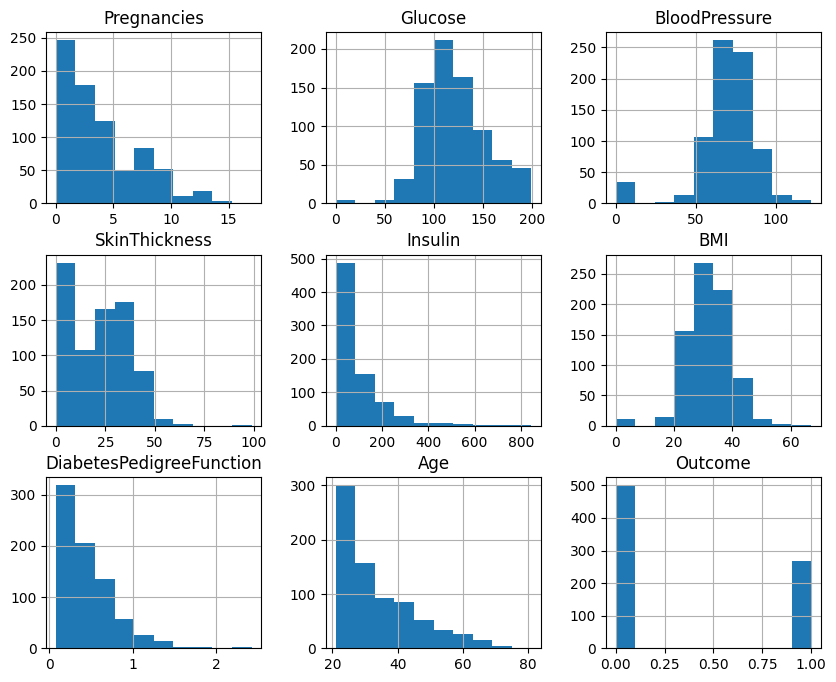

In [481]:
df.hist(figsize=(10,8))

In [482]:
diabetes = df[df['Outcome'] == 1]
no_diabetes = df[df['Outcome'] == 0]

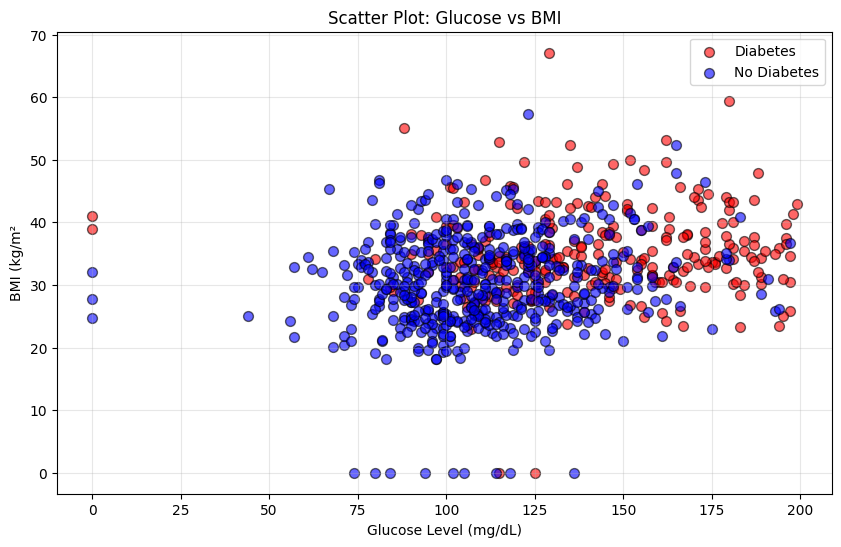

In [483]:
plt.figure(figsize=(10, 6))
plt.scatter(diabetes['Glucose'], diabetes['BMI'], 
            c='red', label='Diabetes', alpha=0.6, edgecolors='k', s = 50)
plt.scatter(no_diabetes['Glucose'], no_diabetes['BMI'], 
            c='blue', label='No Diabetes', alpha=0.6, edgecolors='k', s= 50)
plt.xlabel('Glucose Level (mg/dL)')
plt.ylabel('BMI (kg/m²')
plt.title('Scatter Plot: Glucose vs BMI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('scatter_plot_1.png', dpi=300, bbox_inches='tight')
plt.show()

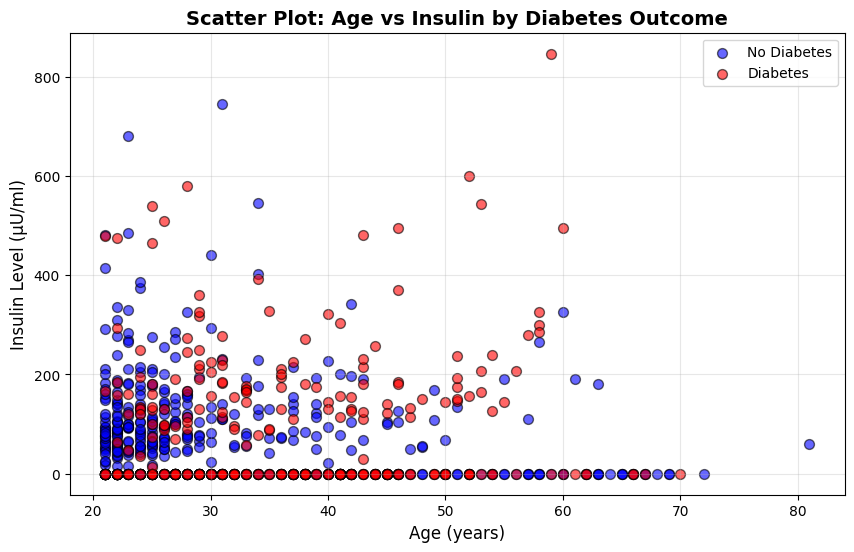

In [484]:
plt.figure(figsize=(10, 6))
plt.scatter(no_diabetes['Age'], no_diabetes['Insulin'], 
            c='blue', label='No Diabetes', alpha=0.6, edgecolors='k', s=50)
plt.scatter(diabetes['Age'], diabetes['Insulin'], 
            c='red', label='Diabetes', alpha=0.6, edgecolors='k', s=50)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Insulin Level (μU/ml)', fontsize=12)
plt.title('Scatter Plot: Age vs Insulin by Diabetes Outcome', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.savefig('scatter_plot_2_age_insulin.png', dpi=300, bbox_inches='tight')
plt.show()

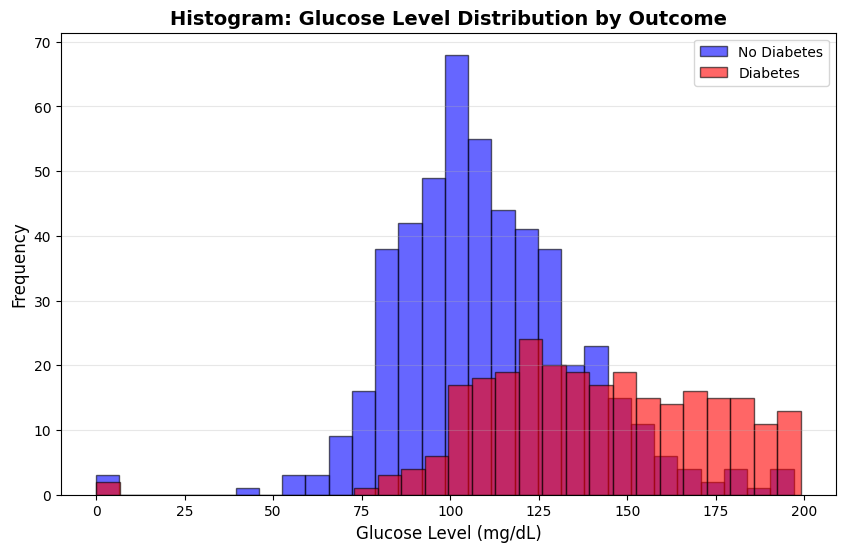

In [485]:
plt.figure(figsize=(10, 6))
plt.hist(no_diabetes['Glucose'], bins=30, alpha=0.6, 
         label='No Diabetes', color='blue', edgecolor='black')
plt.hist(diabetes['Glucose'], bins=30, alpha=0.6, 
         label='Diabetes', color='red', edgecolor='black')
plt.xlabel('Glucose Level (mg/dL)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram: Glucose Level Distribution by Outcome', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.savefig('histogram_1_glucose.png', dpi=300, bbox_inches='tight')
plt.show()

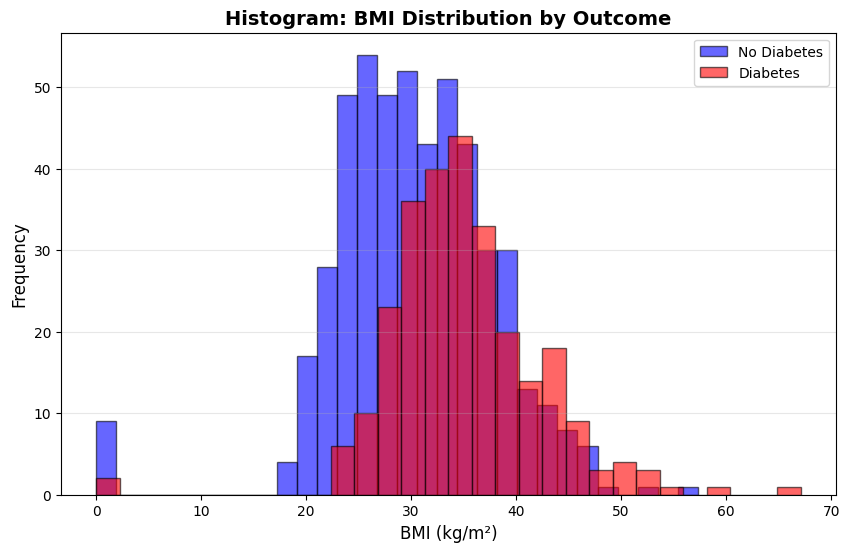

In [486]:
plt.figure(figsize=(10, 6))
plt.hist(no_diabetes['BMI'], bins=30, alpha=0.6, 
         label='No Diabetes', color='blue', edgecolor='black')
plt.hist(diabetes['BMI'], bins=30, alpha=0.6, 
         label='Diabetes', color='red', edgecolor='black')
plt.xlabel('BMI (kg/m²)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram: BMI Distribution by Outcome', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.savefig('histogram_2_bmi.png', dpi=300, bbox_inches='tight')
plt.show()

In [487]:
#find out if there are null values
print(df.isnull().sum()) # this prints the total number of null features/values - if the dataset has any missing values this line detects it
#this works in python but not here...

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [488]:
for col in df.columns[:-1]:  # Exclude 'Outcome'
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        print(f"{col}: {zero_count} zeros ({zero_count/len(df)*100:.2f}%)")

print("\n" + "=" * 30 + "HANDLING ZERO VALUES" + "=" * 30 )
# these are handpicked columns where 0 I believe is to be impossible, from the columns that contain zeroes
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# replace cols that have 0 with NaN in the cols
df_cleaned = df.copy()
df_cleaned[cols_with_zeros] = df_cleaned[cols_with_zeros].replace(0, np.nan)

print("Missing values after identifying zeros as NaN:")
print(df_cleaned.isnull().sum())

# fill with median (fastest approach with good results)
df_cleaned[cols_with_zeros] = df_cleaned[cols_with_zeros].fillna(df_cleaned[cols_with_zeros].median())

print("Missing values after filling NaN:")
print(df_cleaned.isnull().sum())


Pregnancies: 111 zeros (14.45%)
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)
BMI: 11 zeros (1.43%)

==============================HANDLING ZERO VALUES==============================
Missing values after identifying zeros as NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Missing values after filling NaN:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [489]:
print("\nDataset shape after cleaning:", df_cleaned.shape)
print("Missing values after handling:", df_cleaned.isnull().sum().sum())

# save the cleaned data to csv, just in case
df_cleaned.to_csv('diabetes_cleaned.csv', index=False)

df=df_cleaned # replace the old data frame with the new, cleaned data frame



Dataset shape after cleaning: (768, 9)
Missing values after handling: 0


In [490]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Pregnancies                    Axes(0.125,0.653529;0.227941x0.226471)
Glucose                     Axes(0.398529,0.653529;0.227941x0.226471)
BloodPressure               Axes(0.672059,0.653529;0.227941x0.226471)
SkinThickness                  Axes(0.125,0.381765;0.227941x0.226471)
Insulin                     Axes(0.398529,0.381765;0.227941x0.226471)
BMI                         Axes(0.672059,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction           Axes(0.125,0.11;0.227941x0.226471)
Age                             Axes(0.398529,0.11;0.227941x0.226471)
Outcome                         Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

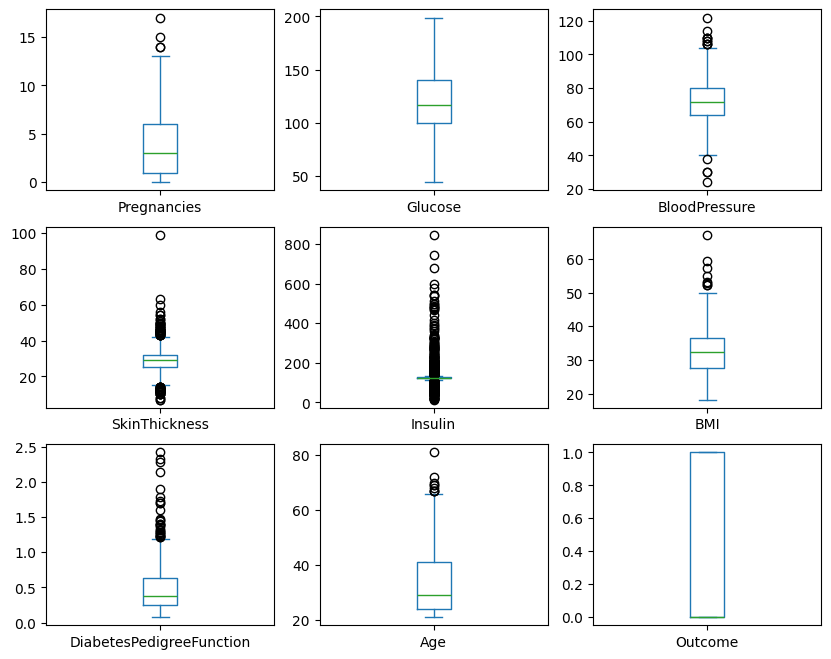

In [491]:
#this is a visualisation for the distribution, to check how many outliers there are
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

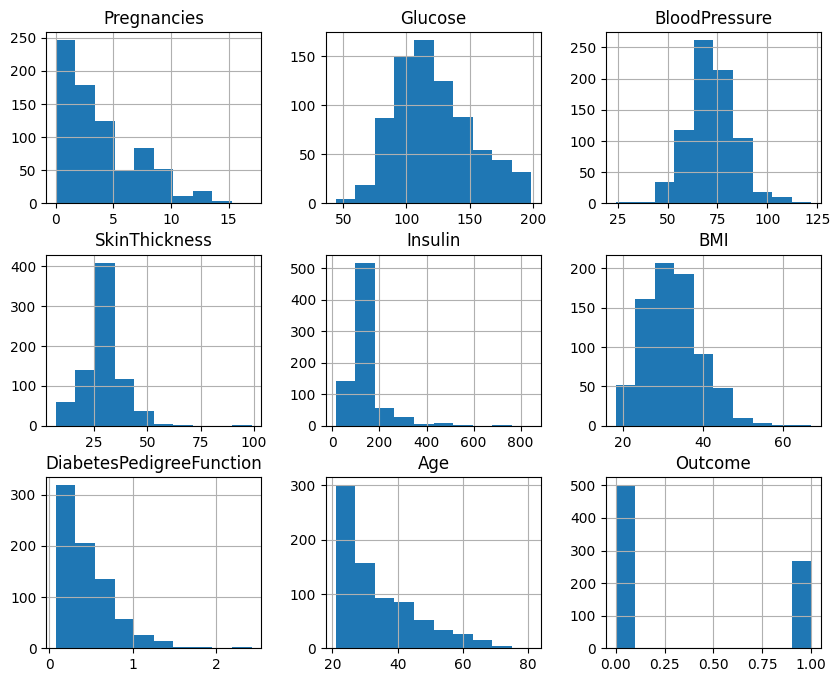

In [492]:
# now to remove outliers - data vis before outlier removal
df.hist(figsize=(10,8))


In [493]:
df_to_filter_i = df[['Insulin']] #these ones have the most outliers and the biggest outliers.
df_to_filter_sk = df[['SkinThickness']] #these ones have the most outliers and the biggest outliers.

In [494]:
#start removing outliers
quantiled_df_i = df_to_filter_i.quantile([0.975]) # i selected 0.1 and 0.9 to get the smallest possible outlier and the biggest possible outlier
quantiled_df_sk = df_to_filter_sk.quantile([0.997])
print(quantiled_df_i, '\n',quantiled_df_sk) # to check what the outliers are

       Insulin
0.975   400.25 
        SkinThickness
0.997         58.796


In [495]:

# this line of code basically does all the work for us. so x is basically df_to_filter which is a table containing only skinThickness and Insulin.
# x.name takes the name of the features and searches for the data objects that are not outliers (more than 0.1 and less than 0.9). this way any outlier will be left aside.

#filtered_df = df_to_filter.apply(lambda x: x[(x>quantiled_df.loc[0.1,x.name]) & (x<quantiled_df.loc[0.9,x.name])], axis=0) # if i want 0.1 as well, but I am focusing more on the upper portion of the outliers, since most outliers lie in the extreme max rather than extreme min
filtered_df_i = df_to_filter_i.apply(lambda x: x.where(x < quantiled_df_i.loc[0.975, x.name]), axis=0)
filtered_df_sk = df_to_filter_sk.apply(lambda x: x.where(x < quantiled_df_sk.loc[0.997, x.name]), axis=0)
print(filtered_df_i, '\n', filtered_df_i.isnull().sum())
print(filtered_df_sk, '\n', filtered_df_sk.isnull().sum())

     Insulin
0      125.0
1      125.0
2      125.0
3       94.0
4      168.0
..       ...
763    180.0
764    125.0
765    112.0
766    125.0
767    125.0

[768 rows x 1 columns] 
 Insulin    20
dtype: int64
     SkinThickness
0             35.0
1             29.0
2             29.0
3             23.0
4             35.0
..             ...
763           48.0
764           27.0
765           23.0
766           29.0
767           31.0

[768 rows x 1 columns] 
 SkinThickness    3
dtype: int64


In [496]:
# in the end, all features that are outliers are filled with NaN, so we do what we did earlier
filtered_df_i = filtered_df_i.fillna(df_to_filter_i.median())
filtered_df_sk = filtered_df_sk.fillna(df_to_filter_sk.median())

print(df_to_filter_i.median())


Insulin    125.0
dtype: float64


In [497]:
filtered_df_i.describe() #see our success

,Insulin
count,768.000000
mean,130.000000
std,54.771661
min,14.000000
25%,121.500000
50%,125.000000
75%,125.000000
max,392.000000


In [498]:
filtered_df_sk.describe()

,SkinThickness
count,768.000000
mean,28.932292
std,8.254940
min,7.000000
25%,25.000000
50%,29.000000
75%,32.000000
max,56.000000


In [499]:
print(filtered_df_i.isnull().sum())
print(filtered_df_sk.isnull().sum())

Insulin    0
dtype: int64
SkinThickness    0
dtype: int64


In [500]:
print(filtered_df_i.isnull().sum())
print(filtered_df_sk.isnull().sum())
df['SkinThickness']=filtered_df_sk
print(df.isnull().sum())
df['Insulin']=filtered_df_i

df.describe() #success!

print(df.isnull().sum())

Insulin    0
dtype: int64
SkinThickness    0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [501]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

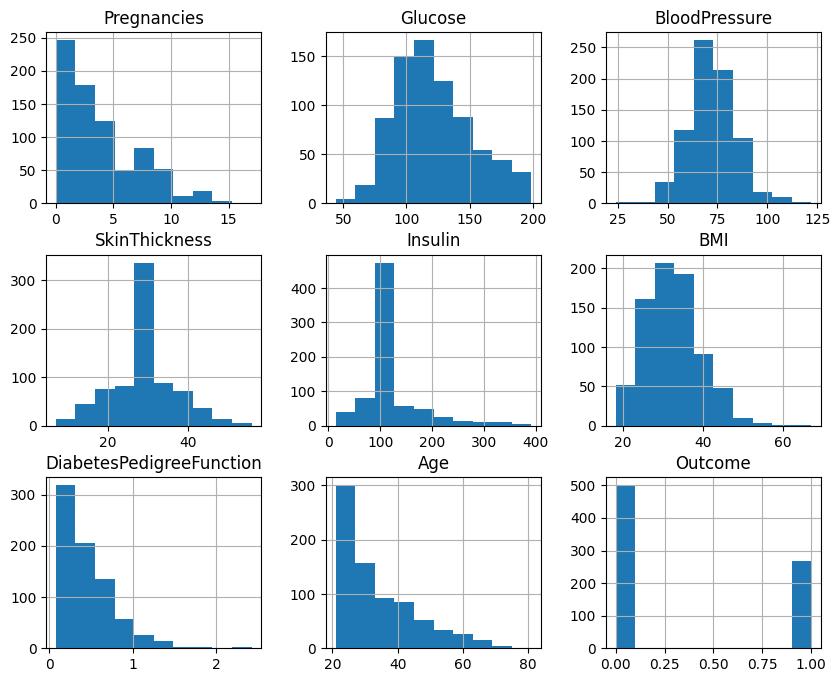

In [502]:
df.hist(figsize=(10,8))

In [ ]:
print(df.mean())

Pregnancies                   3.845052
Glucose                     121.656250
BloodPressure                72.386719
SkinThickness                28.932292
Insulin                     130.000000
BMI                          32.455208
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64


In [ ]:
print(df.median())

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64


In [ ]:
print(df.std())

Pregnancies                  3.369578
Glucose                     30.438286
BloodPressure               12.096642
SkinThickness                8.254940
Insulin                     54.771661
BMI                          6.875177
DiabetesPedigreeFunction     0.331329
Age                         11.760232
Outcome                      0.476951
dtype: float64


In [619]:
df.to_csv('diabetes_cleaned_filtered.csv', index=False)

In [ ]:
diabetes = df[df['Outcome'] == 1]
no_diabetes = df[df['Outcome'] == 0]

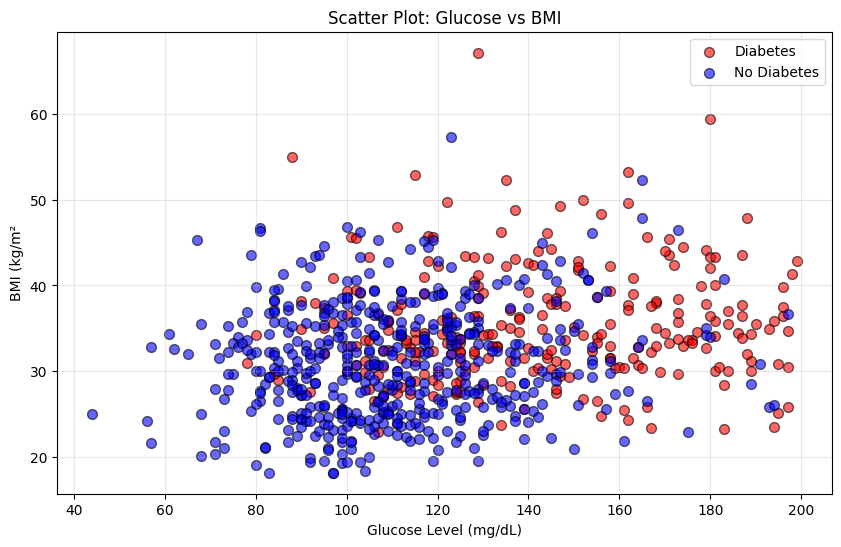

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(diabetes['Glucose'], diabetes['BMI'], 
            c='red', label='Diabetes', alpha=0.6, edgecolors='k', s = 50)
plt.scatter(no_diabetes['Glucose'], no_diabetes['BMI'], 
            c='blue', label='No Diabetes', alpha=0.6, edgecolors='k', s= 50)
plt.xlabel('Glucose Level (mg/dL)')
plt.ylabel('BMI (kg/m²')
plt.title('Scatter Plot: Glucose vs BMI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('scatter_plot_1.png', dpi=300, bbox_inches='tight')
plt.show()

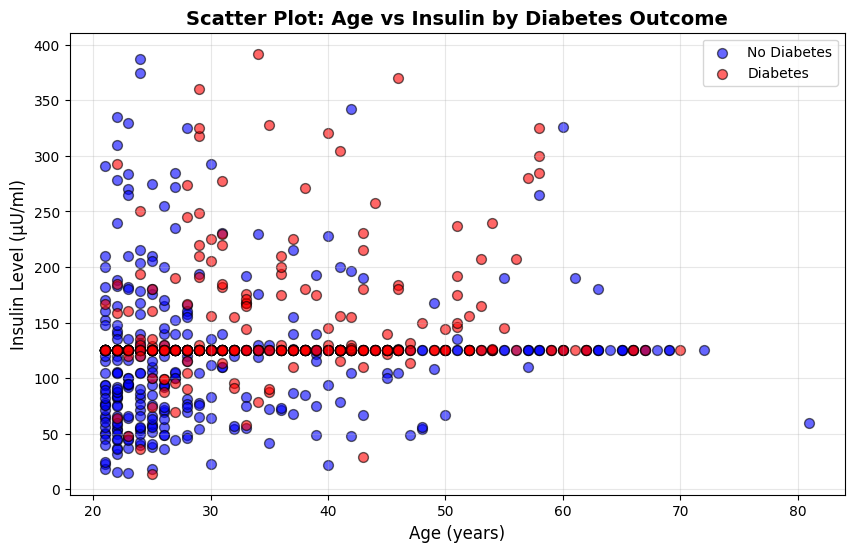

In [508]:
plt.figure(figsize=(10, 6))
plt.scatter(no_diabetes['Age'], no_diabetes['Insulin'], 
            c='blue', label='No Diabetes', alpha=0.6, edgecolors='k', s=50)
plt.scatter(diabetes['Age'], diabetes['Insulin'], 
            c='red', label='Diabetes', alpha=0.6, edgecolors='k', s=50)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Insulin Level (μU/ml)', fontsize=12)
plt.title('Scatter Plot: Age vs Insulin by Diabetes Outcome', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.savefig('scatter_plot_2_age_insulin.png', dpi=300, bbox_inches='tight')
plt.show()

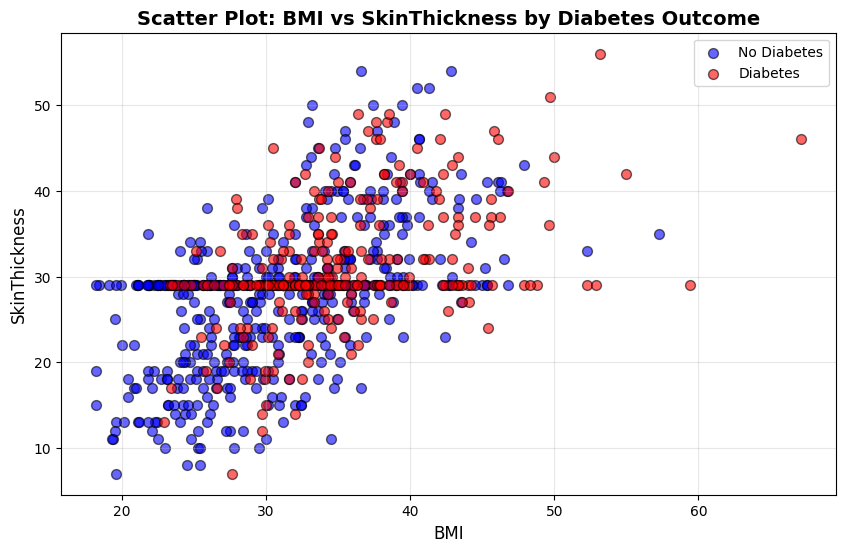

In [509]:
plt.figure(figsize=(10, 6))
plt.scatter(no_diabetes['BMI'], no_diabetes['SkinThickness'], 
            c='blue', label='No Diabetes', alpha=0.6, edgecolors='k', s=50)
plt.scatter(diabetes['BMI'], diabetes['SkinThickness'], 
            c='red', label='Diabetes', alpha=0.6, edgecolors='k', s=50)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('SkinThickness', fontsize=12)
plt.title('Scatter Plot: BMI vs SkinThickness by Diabetes Outcome', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.savefig('scatter_plot_2_age_insulin.png', dpi=300, bbox_inches='tight')
plt.show()

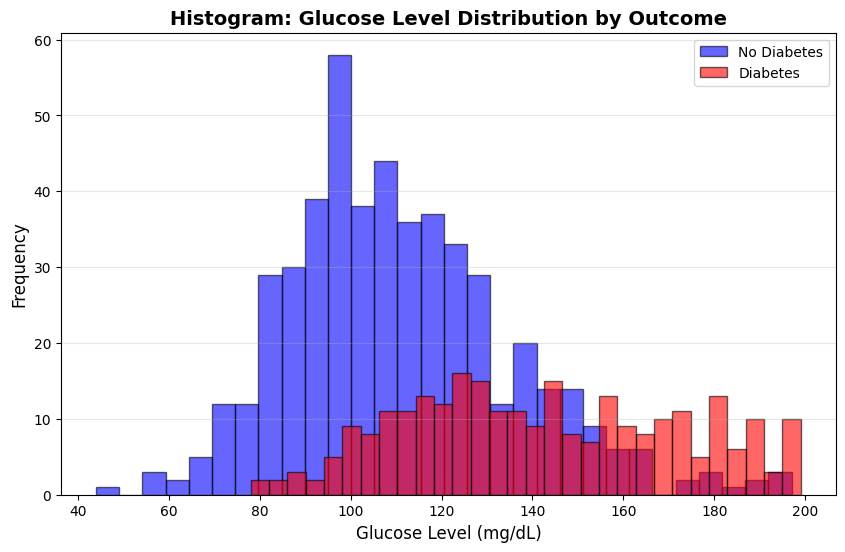

In [510]:
plt.figure(figsize=(10, 6))
plt.hist(no_diabetes['Glucose'], bins=30, alpha=0.6, 
         label='No Diabetes', color='blue', edgecolor='black')
plt.hist(diabetes['Glucose'], bins=30, alpha=0.6, 
         label='Diabetes', color='red', edgecolor='black')
plt.xlabel('Glucose Level (mg/dL)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram: Glucose Level Distribution by Outcome', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.savefig('histogram_1_glucose.png', dpi=300, bbox_inches='tight')
plt.show()

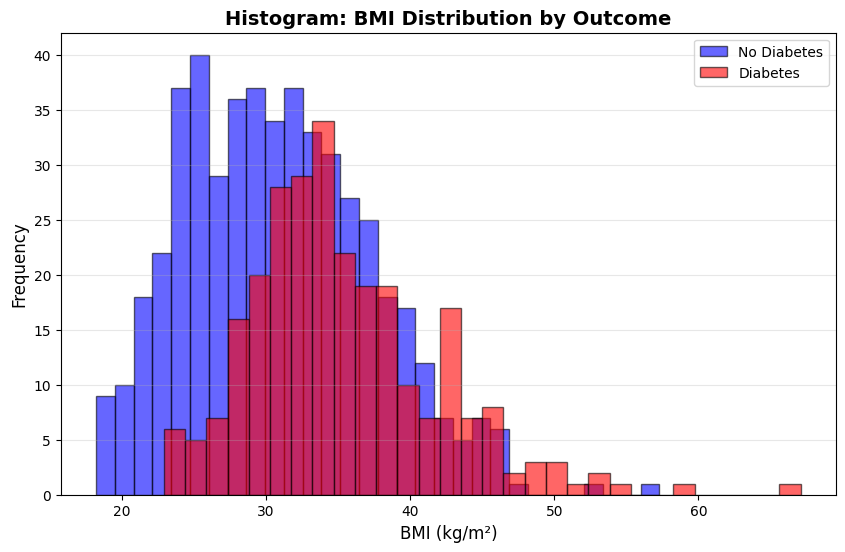

In [511]:
plt.figure(figsize=(10, 6))
plt.hist(no_diabetes['BMI'], bins=30, alpha=0.6, 
         label='No Diabetes', color='blue', edgecolor='black')
plt.hist(diabetes['BMI'], bins=30, alpha=0.6, 
         label='Diabetes', color='red', edgecolor='black')
plt.xlabel('BMI (kg/m²)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram: BMI Distribution by Outcome', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.savefig('histogram_2_bmi.png', dpi=300, bbox_inches='tight')
plt.show()

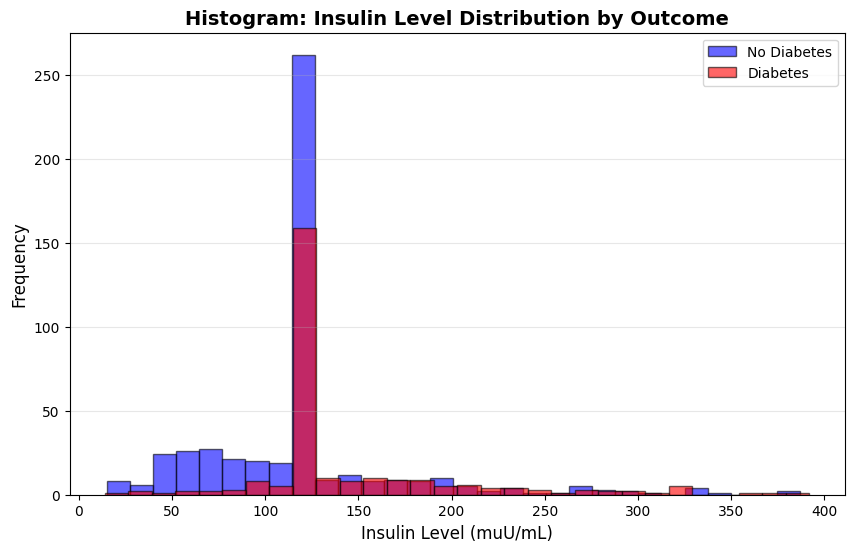

In [512]:
plt.figure(figsize=(10, 6))
plt.hist(no_diabetes['Insulin'], bins=30, alpha=0.6, 
         label='No Diabetes', color='blue', edgecolor='black')
plt.hist(diabetes['Insulin'], bins=30, alpha=0.6, 
         label='Diabetes', color='red', edgecolor='black')
plt.xlabel('Insulin Level (muU/mL)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram: Insulin Level Distribution by Outcome', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.savefig('histogram_3_Insulin.png', dpi=300, bbox_inches='tight')
plt.show()

Creating Correlation Matrix...


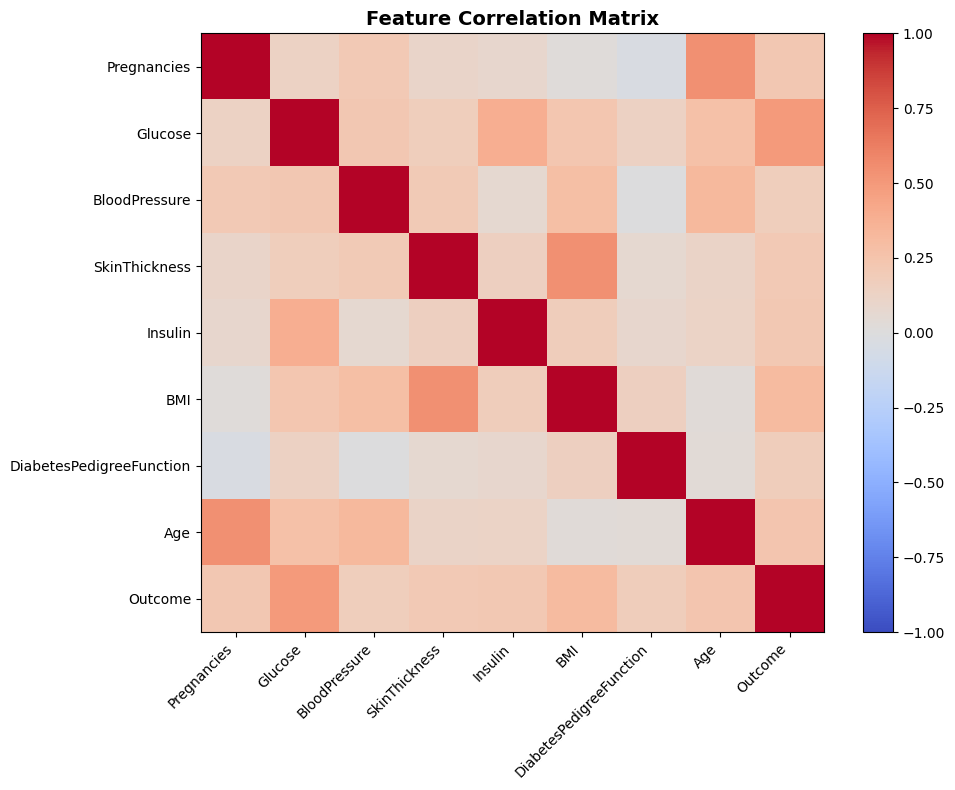

In [513]:
print("Creating Correlation Matrix...")
plt.figure(figsize=(10, 8))
correlation = df_cleaned.corr()
# Manual heatmap using imshow
im = plt.imshow(correlation, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im)
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

### Choosing features with box plots


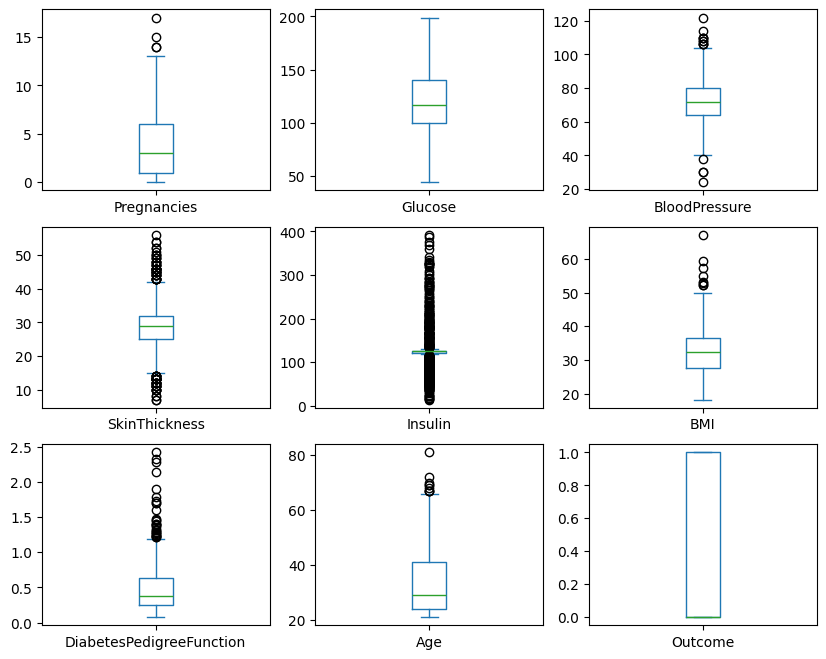

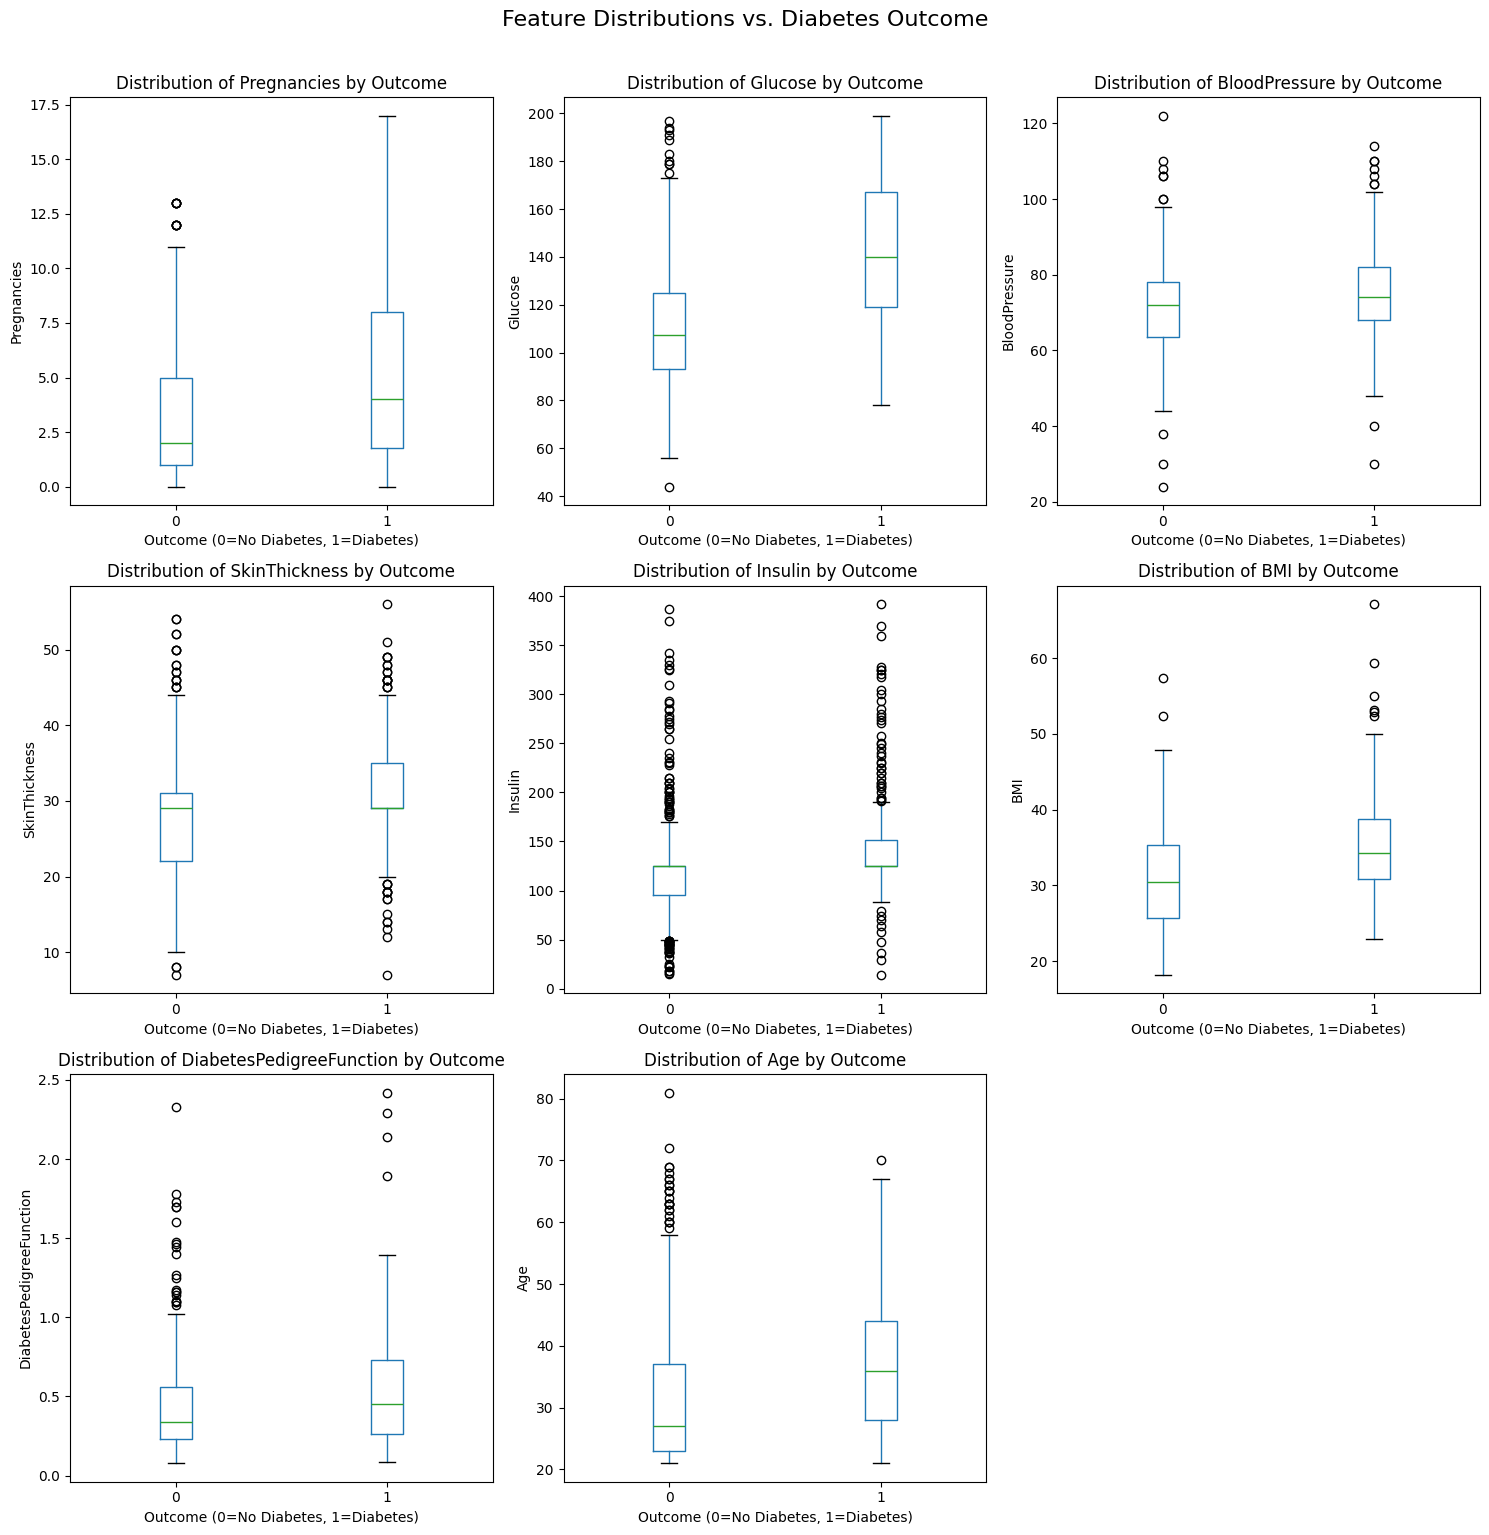

In [ ]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

features = [col for col in df.columns if col != 'Outcome']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(features):
    if i < len(axes): 
        df.boxplot(column=feature, by='Outcome', ax=axes[i], grid=False)
        axes[i].set_title(f'Distribution of {feature} by Outcome')
        axes[i].set_xlabel('Outcome (0=No Diabetes, 1=Diabetes)')
        axes[i].set_ylabel(feature)

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Feature Distributions vs. Diabetes Outcome', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1.01])
plt.show()

# PART II

In [ ]:
print(df.isnull().sum()) # check

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [585]:
X=df.drop(['Outcome', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Pregnancies'], axis=1) # separating labels from data
y=df['Outcome']

In [586]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: title={'center': 'Age'}>]],
      dtype=object)

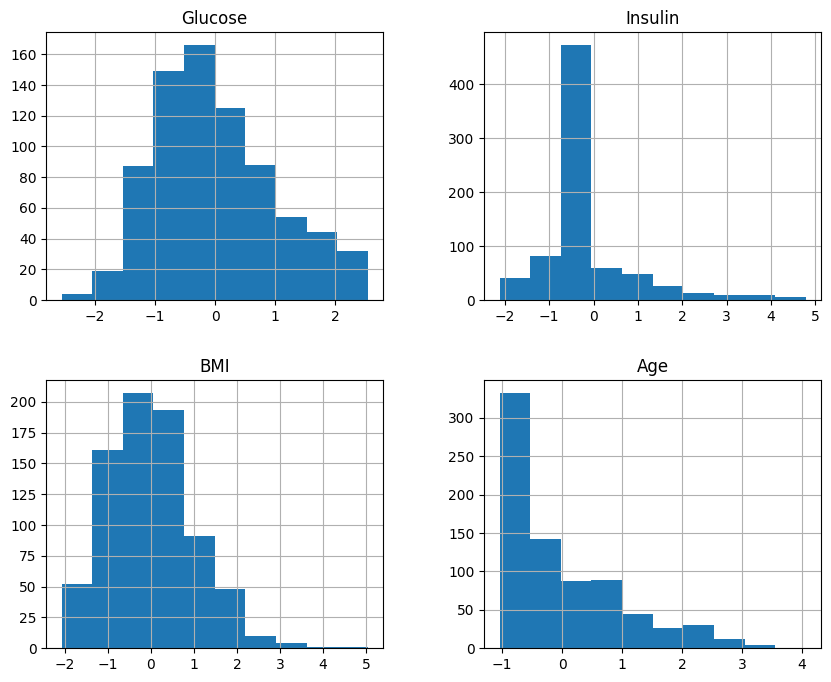

In [587]:
X_scaled_df.hist(figsize=(10,8))

#### 1. Hierarchical Clustering

In [588]:
linkage_matrix_full = linkage(X_scaled, method='ward', metric='euclidean')

##### Experiment 1 - cut-off distance at 50

In [589]:
clusters_exp1 = fcluster(linkage_matrix_full, t=50, criterion='distance')
n_clusters_exp1 = len(np.unique(clusters_exp1))
print(f"Number of clusters formed: {n_clusters_exp1}")
print(f"Cluster distribution: {np.bincount(clusters_exp1)[1:]}")

Number of clusters formed: 1
Cluster distribution: [768]


##### Experiment 2 - cut-off distance at 30

In [590]:
clusters_exp2 = fcluster(linkage_matrix_full, t=30, criterion='distance')
n_clusters_exp2 = len(np.unique(clusters_exp2))
print(f"Number of clusters formed: {n_clusters_exp2}")
print(f"Cluster distribution: {np.bincount(clusters_exp2)[1:]}")

Number of clusters formed: 2
Cluster distribution: [283 485]


##### Experiment 3 - cut-off distance at 20

In [591]:
clusters_exp3 = fcluster(linkage_matrix_full, t=20, criterion='distance')
n_clusters_exp3 = len(np.unique(clusters_exp3))
print(f"Number of clusters formed: {n_clusters_exp3}")
print(f"Cluster distribution: {np.bincount(clusters_exp3)[1:]}")


Number of clusters formed: 4
Cluster distribution: [283  85 212 188]


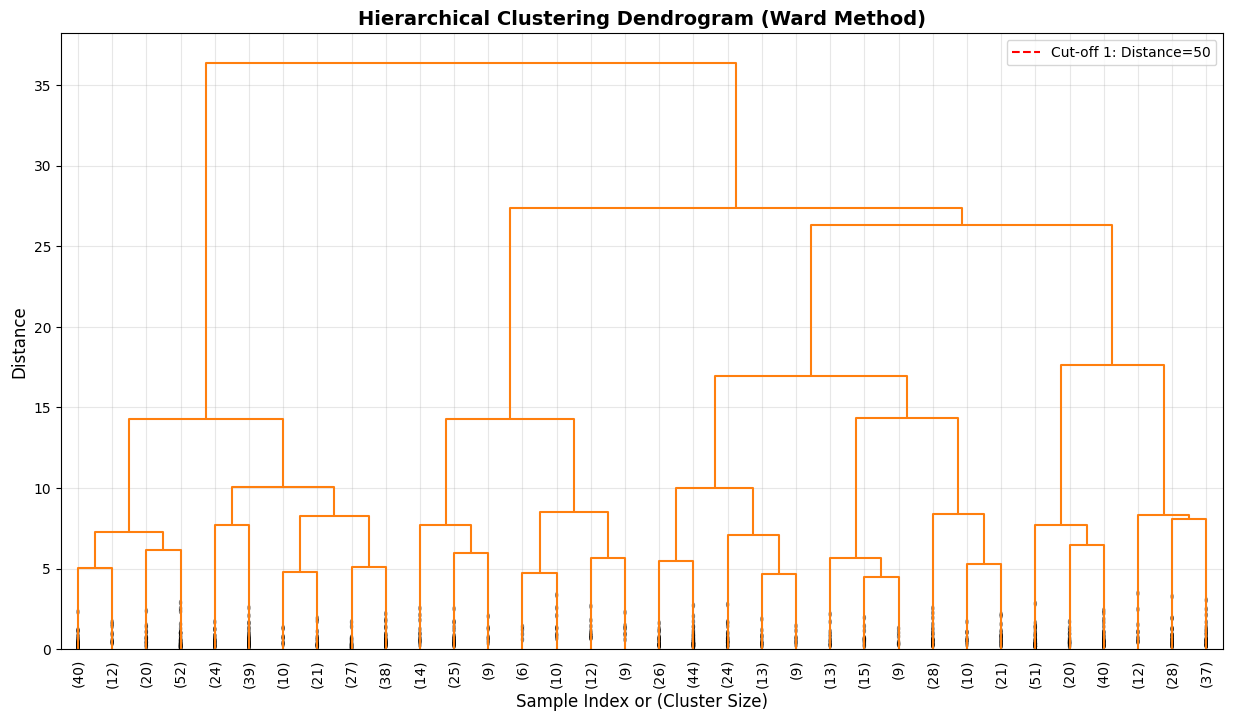

In [ ]:
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix_full, 
           truncate_mode='lastp',  # shows only the last p clusters, in this case 34
           p=34,  # number of clusters to show, not to aglomerate the figure
# color for screenshots
           color_threshold=50,  
    above_threshold_color='grey',
           leaf_rotation=90,
           leaf_font_size=10,
           show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Method)', fontsize=14, fontweight='bold')
plt.xlabel('Object Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=50, color='r', linestyle='--', label='Cut-off 1: Distance=50')
# plt.axhline(y=30, color='g', linestyle='--', label='Cut-off 2: Distance=30')
# plt.axhline(y=20, color='b', linestyle='--', label='Cut-off 3: Distance=20')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('hierarchical_dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [593]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score

create some scoring with this from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score



for three experiments. first cutoff line is 50, second is 30, third is 20

In [594]:
ari_exp1 = adjusted_rand_score(y, clusters_exp1)
homogeneity_exp1 = homogeneity_score(y, clusters_exp1)
completeness_exp1 = completeness_score(y, clusters_exp1)
print(f"Adjusted Rand Index: {ari_exp1:.3f}")
print(f"Homogeneity Score: {homogeneity_exp1:.3f}")
print(f"Completeness Score: {completeness_exp1:.3f}")


Adjusted Rand Index: 0.000
Homogeneity Score: 0.000
Completeness Score: 1.000


In [595]:
ari_exp2 = adjusted_rand_score(y, clusters_exp2)
homogeneity_exp2 = homogeneity_score(y, clusters_exp2)
completeness_exp2 = completeness_score(y, clusters_exp2)
print(f"Adjusted Rand Index: {ari_exp2:.3f}")
print(f"Homogeneity Score: {homogeneity_exp2:.3f}")
print(f"Completeness Score: {completeness_exp2:.3f}")


Adjusted Rand Index: 0.077
Homogeneity Score: 0.139
Completeness Score: 0.137


In [596]:
ari_exp3 = adjusted_rand_score(y, clusters_exp3)
homogeneity_exp3 = homogeneity_score(y, clusters_exp3)
completeness_exp3 = completeness_score(y, clusters_exp3)
print(f"Adjusted Rand Index: {ari_exp3:.3f}")
print(f"Homogeneity Score: {homogeneity_exp3:.3f}")
print(f"Completeness Score: {completeness_exp3:.3f}")


Adjusted Rand Index: 0.119
Homogeneity Score: 0.144
Completeness Score: 0.071


In [597]:
hierarchical_results = pd.DataFrame({
    'Experiment': ['Exp 1', 'Exp 2', 'Exp 3'],
    'Cut-off Distance': [50, 30, 20],
    'N Clusters': [n_clusters_exp1, n_clusters_exp2, n_clusters_exp3],
    'Adjusted Rand Index': [ari_exp1, ari_exp2, ari_exp3],
    'Homogeneity': [homogeneity_exp1, homogeneity_exp2, homogeneity_exp3],
    'Completeness': [completeness_exp1, completeness_exp2, completeness_exp3]
})
print(hierarchical_results.to_string(index=False))


Experiment  Cut-off Distance  N Clusters  Adjusted Rand Index  Homogeneity  Completeness
     Exp 1                50           1             0.000000     0.000000      1.000000
     Exp 2                30           2             0.076710     0.139416      0.137012
     Exp 3                20           4             0.119411     0.143513      0.070787


#### 2. K-Means algorithm

In [598]:
k_values = [2, 3, 4, 5, 6] 
silhouette_scores = []
inertias = []
kmeans_models = {}

In [599]:
for k in k_values:
    print(f"\nresults for experiment: {k}")
    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    inertia = kmeans.inertia_
    
    if k == 2: #because there are two classes so these statistics will be rpovided just for tis k
        ari = adjusted_rand_score(y, cluster_labels)
        homogeneity = homogeneity_score(y, cluster_labels)
        completeness = completeness_score(y, cluster_labels)
        print(f"Adjusted Rand Index: {ari:.3f}")
        print(f"Homogeneity Score: {homogeneity:.3f}")
        print(f"Completeness Score: {completeness:.3f}")
    
    silhouette_scores.append(silhouette_avg)
    inertias.append(inertia)
    kmeans_models[k] = kmeans
    
    print(f"Silhouette Score: {silhouette_avg:.3f}")
    print(f"Inertia (Within-cluster sum of squares): {inertia:.2f}")
    print(f"Cluster sizes: {np.bincount(cluster_labels)}")



results for experiment: 2
Adjusted Rand Index: 0.218
Homogeneity Score: 0.167
Completeness Score: 0.158
Silhouette Score: 0.271
Inertia (Within-cluster sum of squares): 2229.10
Cluster sizes: [340 428]

results for experiment: 3
Silhouette Score: 0.279
Inertia (Within-cluster sum of squares): 1821.45
Cluster sizes: [392 178 198]

results for experiment: 4
Silhouette Score: 0.272
Inertia (Within-cluster sum of squares): 1521.97
Cluster sizes: [339  61 170 198]

results for experiment: 5
Silhouette Score: 0.232
Inertia (Within-cluster sum of squares): 1338.26
Cluster sizes: [ 63 231 225 119 130]

results for experiment: 6
Silhouette Score: 0.225
Inertia (Within-cluster sum of squares): 1214.72
Cluster sizes: [198  86 198  49 118 119]


In [600]:

kmeans_results = pd.DataFrame({
    'k': k_values,
    'Silhouette Score': silhouette_scores,
    'Inertia': inertias
})
print(kmeans_results.to_string(index=False))

 k  Silhouette Score     Inertia
 2          0.271191 2229.096068
 3          0.279258 1821.450230
 4          0.272013 1521.969055
 5          0.232137 1338.261073
 6          0.225216 1214.724464


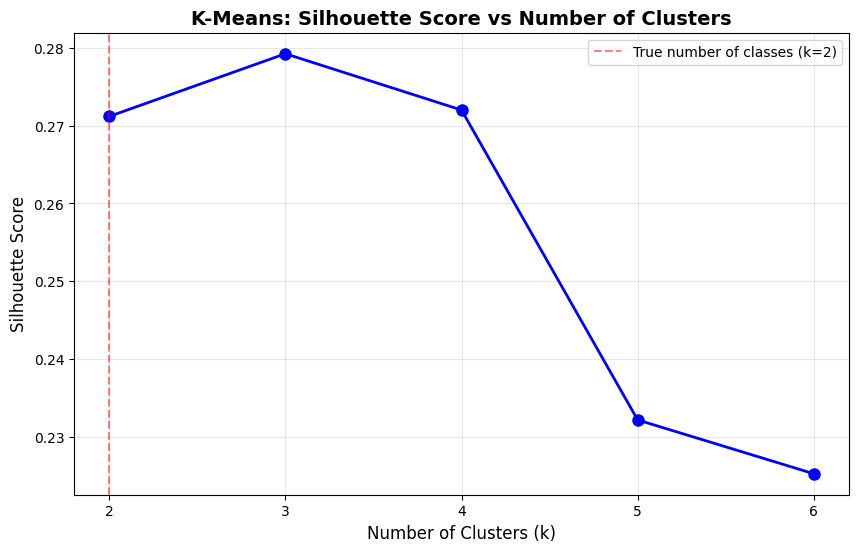

In [601]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linewidth=2, markersize=8, color='blue')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('K-Means: Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.axvline(x=2, color='red', linestyle='--', alpha=0.5, label='True number of classes (k=2)')
plt.legend()
plt.savefig('kmeans_silhouette_scores.png', dpi=300, bbox_inches='tight')
plt.show()

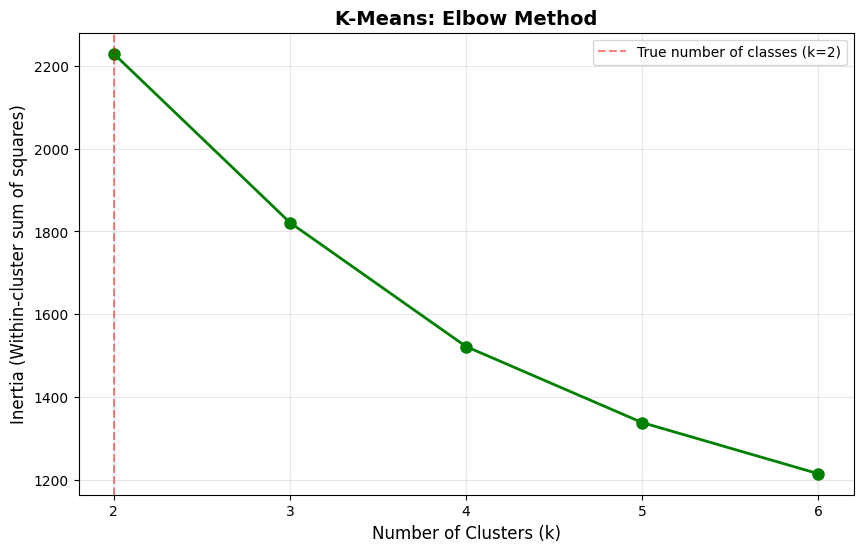

In [602]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o', linewidth=2, markersize=8, color='green')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
plt.title('K-Means: Elbow Method', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.axvline(x=2, color='red', linestyle='--', alpha=0.5, label='True number of classes (k=2)')
plt.legend()
plt.savefig('kmeans_elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
k_best=None
best_score=-1
for k,x in zip(k_values, silhouette_scores):
    if x>best_score:
        best_score=x
        k_best=k
kmeans_best = kmeans_models[k_best]
cluster_labels = kmeans_best.labels_
silhouette_vals = silhouette_objectss(X_scaled, cluster_labels)

print(f"Average Silhouette Score: {silhouette_scores[k_values.index(k_best)]:.3f}")
print(f"Silhouette scores range: [{silhouette_vals.min():.3f}, {silhouette_vals.max():.3f}]")


Average Silhouette Score: 0.279
Silhouette scores range: [-0.172, 0.562]


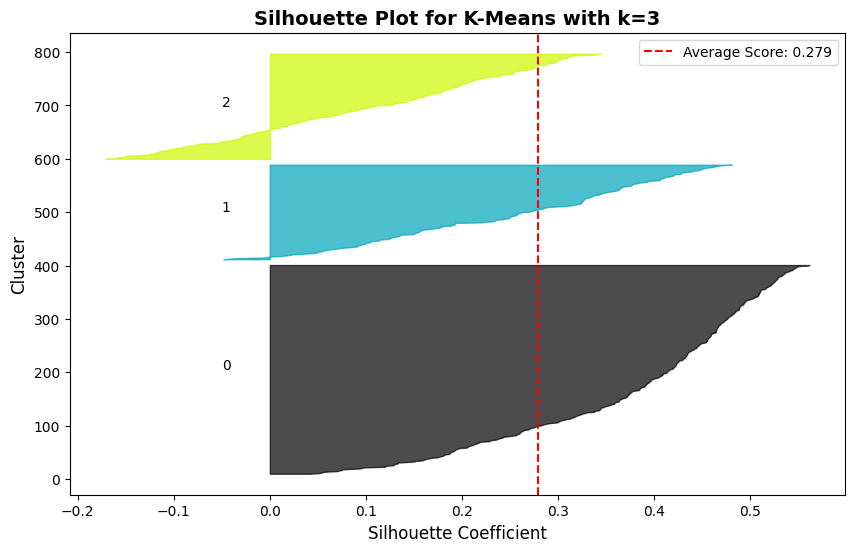

In [613]:
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10

for i in range(k_best):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.nipy_spectral(float(i) / k_best)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title(f'Silhouette Plot for K-Means with k={k_best}', fontsize=14, fontweight='bold')
ax.set_xlabel('Silhouette Coefficient', fontsize=12)
ax.set_ylabel('Cluster', fontsize=12)
ax.axvline(x=silhouette_scores[k_values.index(k_best)], color="red", linestyle="--", 
           label=f'Average Score: {silhouette_scores[k_values.index(k_best)]:.3f}')
ax.legend()
plt.savefig('kmeans_silhouette_plot_k2.png', dpi=300, bbox_inches='tight')
plt.show()

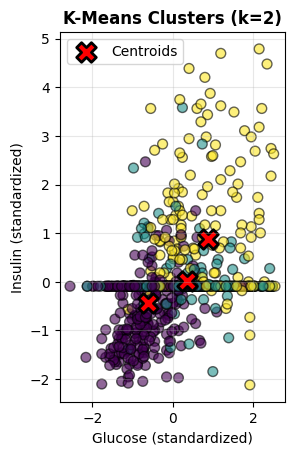

In [614]:
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, 
            cmap='viridis', alpha=0.6, edgecolors='k', s=50)
plt.scatter(kmeans_best.cluster_centers_[:, 0], kmeans_best.cluster_centers_[:, 1],
            c='red', marker='X', s=200, edgecolors='k', linewidths=2, label='Centroids')
plt.xlabel(f'{X.columns[0]} (standardized)', fontsize=10)
plt.ylabel(f'{X.columns[1]} (standardized)', fontsize=10)
plt.title('K-Means Clusters (k=2)', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

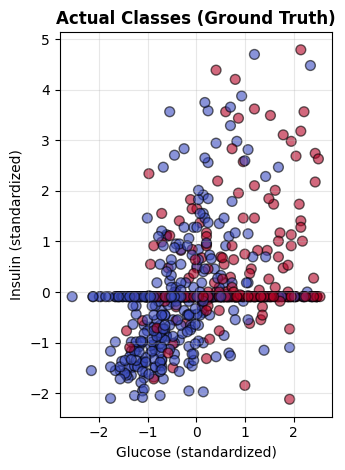

In [615]:
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, 
            cmap='coolwarm', alpha=0.6, edgecolors='k', s=50)
plt.xlabel(f'{X.columns[0]} (standardized)', fontsize=10)
plt.ylabel(f'{X.columns[1]} (standardized)', fontsize=10)
plt.title('Actual Classes (Ground Truth)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('cluster_comparison_2d.png', dpi=300, bbox_inches='tight')
plt.show()

# PART III

In [656]:
#import models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#ANN instead of orange ANN
from sklearn.neural_network import MLPClassifier

In [ ]:
#pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [620]:
#metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, auc, roc_auc_score)

In [621]:
#import the data again to start clean
df = pd.read_csv('diabetes_cleaned_filtered.csv')

In [ ]:
#verify data
print(f"\nDataset loaded: {df.shape[0]} objects, {df.shape[1]} features\n")
print(df.head())



Dataset loaded: 768 samples, 9 features

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
#separate features from outcome/classes as was done before
X = df.drop(['Outcome', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Pregnancies'], axis=1)
y = df['Outcome']


In [633]:
#scale the features as done before
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [634]:
#split the data set - 70% for train and 30% for test was chosen based on articles read
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [645]:
#number of data objects in  dataset
print(f"Number of data objects in train dataset: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Number of data objects in test dataset: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

Number of data objects in train dataset: 537 (69.9%)
Number of data objects in test dataset: 231 (30.1%)


In [651]:
train_class_dist = pd.Series(y_train).value_counts().sort_index()
label = ['Non-diabetic', 'Diabetic']
for cls, count in train_class_dist.items():
    print(f"  Class {cls}: {count} - {label[int(cls)]} objects ({count/len(y_train)*100:.1f}%) for the training dataset")


  Class 0: 350 - Non-diabetic objects (65.2%) for the training dataset
  Class 1: 187 - Diabetic objects (34.8%) for the training dataset


In [652]:
train_class_dist = pd.Series(y_test).value_counts().sort_index()
for cls, count in train_class_dist.items():
    print(f"  Class {cls}: {count} - {label[int(cls)]} objects ({count/len(y_test)*100:.1f}%) for the testing dataset")


  Class 0: 150 - Non-diabetic objects (64.9%) for the testing dataset
  Class 1: 81 - Diabetic objects (35.1%) for the testing dataset


In [ ]:
#to store results
results_train = {}
results_test = {}
all_models = {}

#### 1. Logistic Regression Model

In [676]:
lr_experiments = []

In [677]:
lr1 = LogisticRegression(l1_ratio=0, C=0.1, solver='lbfgs', max_iter=500, random_state=42)
lr1.fit(X_train, y_train)
y_pred_lr1 = lr1.predict(X_train)

In [678]:
print(f"Training Accuracy:  {accuracy_score(y_train, y_pred_lr1):.4f}")
print(f"Training Precision: {precision_score(y_train, y_pred_lr1):.4f}")
print(f"Training Recall:    {recall_score(y_train, y_pred_lr1):.4f}")
print(f"Training F1-Score:  {f1_score(y_train, y_pred_lr1):.4f}")
lr_experiments.append({
    'Experiment': 'LR-1', 'penalty': 'l2', 'C': 0.1, 'solver': 'lbfgs',
    'Accuracy': accuracy_score(y_train, y_pred_lr1),
    'Precision': precision_score(y_train, y_pred_lr1),
    'Recall': recall_score(y_train, y_pred_lr1),
    'F1-Score': f1_score(y_train, y_pred_lr1)
})

Training Accuracy:  0.7803
Training Precision: 0.7447
Training Recall:    0.5615
Training F1-Score:  0.6402


In [679]:
lr2 = LogisticRegression(l1_ratio=0, C=1.0, solver='lbfgs', max_iter=500, random_state=42)
lr2.fit(X_train, y_train)
y_pred_lr2 = lr2.predict(X_train)


In [680]:
print(f"Training Accuracy:  {accuracy_score(y_train, y_pred_lr2):.4f}")
print(f"Training Precision: {precision_score(y_train, y_pred_lr2):.4f}")
print(f"Training Recall:    {recall_score(y_train, y_pred_lr2):.4f}")
print(f"Training F1-Score:  {f1_score(y_train, y_pred_lr2):.4f}")
lr_experiments.append({
    'Experiment': 'LR-2', 'penalty': 'l2', 'C': 1.0, 'solver': 'lbfgs',
    'Accuracy': accuracy_score(y_train, y_pred_lr2),
    'Precision': precision_score(y_train, y_pred_lr2),
    'Recall': recall_score(y_train, y_pred_lr2),
    'F1-Score': f1_score(y_train, y_pred_lr2)
})

Training Accuracy:  0.7803
Training Precision: 0.7413
Training Recall:    0.5668
Training F1-Score:  0.6424


In [681]:
lr3 = LogisticRegression(l1_ratio=0, C=10.0, solver='lbfgs', max_iter=500, random_state=42)
lr3.fit(X_train, y_train)
y_pred_lr3 = lr3.predict(X_train)

In [682]:
print(f"Training Accuracy:  {accuracy_score(y_train, y_pred_lr3):.4f}")
print(f"Training Precision: {precision_score(y_train, y_pred_lr3):.4f}")
print(f"Training Recall:    {recall_score(y_train, y_pred_lr3):.4f}")
print(f"Training F1-Score:  {f1_score(y_train, y_pred_lr3):.4f}")
lr_experiments.append({
    'Experiment': 'LR-3', 'penalty': 'l2', 'C': 10.0, 'solver': 'lbfgs',
    'Accuracy': accuracy_score(y_train, y_pred_lr3),
    'Precision': precision_score(y_train, y_pred_lr3),
    'Recall': recall_score(y_train, y_pred_lr3),
    'F1-Score': f1_score(y_train, y_pred_lr3)
})

Training Accuracy:  0.7803
Training Precision: 0.7413
Training Recall:    0.5668
Training F1-Score:  0.6424


In [683]:
#make a table for results
lr_df = pd.DataFrame(lr_experiments)

In [684]:
print(lr_df.to_string(index=False))


Experiment penalty    C solver  Accuracy  Precision   Recall  F1-Score
      LR-1      l2  0.1  lbfgs  0.780261   0.744681 0.561497  0.640244
      LR-2      l2  1.0  lbfgs  0.780261   0.741259 0.566845  0.642424
      LR-3      l2 10.0  lbfgs  0.780261   0.741259 0.566845  0.642424


In [685]:
best_lr_idx = lr_df['F1-Score'].idxmax()
best_lr = [lr1, lr2, lr3][best_lr_idx]
print(f"\n✓ Best LR model: Experiment {best_lr_idx + 1} (F1-Score: {lr_df.iloc[best_lr_idx]['F1-Score']:.4f})")
all_models['Logistic Regression'] = best_lr


✓ Best LR model: Experiment 2 (F1-Score: 0.6424)


#### 2. Random Forest Classifier

In [686]:
rf_experiments = []

In [687]:
rf1 = RandomForestClassifier(
    n_estimators=50, max_depth=5, min_samples_split=10,
    min_samples_leaf=5, criterion='gini', random_state=42
)
rf1.fit(X_train, y_train)
y_pred_rf1 = rf1.predict(X_train)

In [688]:
print(f"Training Accuracy:  {accuracy_score(y_train, y_pred_rf1):.4f}")
print(f"Training Precision: {precision_score(y_train, y_pred_rf1):.4f}")
print(f"Training Recall:    {recall_score(y_train, y_pred_rf1):.4f}")
print(f"Training F1-Score:  {f1_score(y_train, y_pred_rf1):.4f}")
rf_experiments.append({
    'Experiment': 'RF-1', 'n_estimators': 50, 'max_depth': 5, 'min_split': 10, 'min_leaf': 5,
    'Accuracy': accuracy_score(y_train, y_pred_rf1),
    'Precision': precision_score(y_train, y_pred_rf1),
    'Recall': recall_score(y_train, y_pred_rf1),
    'F1-Score': f1_score(y_train, y_pred_rf1)
})

Training Accuracy:  0.8343
Training Precision: 0.7952
Training Recall:    0.7059
Training F1-Score:  0.7479


In [689]:
rf2 = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_split=5,
    min_samples_leaf=2, criterion='gini', random_state=42
)
rf2.fit(X_train, y_train)
y_pred_rf2 = rf2.predict(X_train)

In [690]:
print(f"Training Accuracy:  {accuracy_score(y_train, y_pred_rf2):.4f}")
print(f"Training Precision: {precision_score(y_train, y_pred_rf2):.4f}")
print(f"Training Recall:    {recall_score(y_train, y_pred_rf2):.4f}")
print(f"Training F1-Score:  {f1_score(y_train, y_pred_rf2):.4f}")
rf_experiments.append({
    'Experiment': 'RF-2', 'n_estimators': 100, 'max_depth': 10, 'min_split': 5, 'min_leaf': 2,
    'Accuracy': accuracy_score(y_train, y_pred_rf2),
    'Precision': precision_score(y_train, y_pred_rf2),
    'Recall': recall_score(y_train, y_pred_rf2),
    'F1-Score': f1_score(y_train, y_pred_rf2)
})

Training Accuracy:  0.9385
Training Precision: 0.9477
Training Recall:    0.8717
Training F1-Score:  0.9081


In [691]:
rf3 = RandomForestClassifier(
    n_estimators=200, max_depth=20, min_samples_split=2,
    min_samples_leaf=1, criterion='gini', random_state=42
)
rf3.fit(X_train, y_train)
y_pred_rf3 = rf3.predict(X_train)

In [692]:
print(f"Training Accuracy:  {accuracy_score(y_train, y_pred_rf3):.4f}")
print(f"Training Precision: {precision_score(y_train, y_pred_rf3):.4f}")
print(f"Training Recall:    {recall_score(y_train, y_pred_rf3):.4f}")
print(f"Training F1-Score:  {f1_score(y_train, y_pred_rf3):.4f}")
rf_experiments.append({
    'Experiment': 'RF-3', 'n_estimators': 200, 'max_depth': 20, 'min_split': 2, 'min_leaf': 1,
    'Accuracy': accuracy_score(y_train, y_pred_rf3),
    'Precision': precision_score(y_train, y_pred_rf3),
    'Recall': recall_score(y_train, y_pred_rf3),
    'F1-Score': f1_score(y_train, y_pred_rf3)
})


Training Accuracy:  1.0000
Training Precision: 1.0000
Training Recall:    1.0000
Training F1-Score:  1.0000


In [693]:
rf_df = pd.DataFrame(rf_experiments)

In [694]:
print(rf_df.to_string(index=False))

Experiment  n_estimators  max_depth  min_split  min_leaf  Accuracy  Precision   Recall  F1-Score
      RF-1            50          5         10         5  0.834264   0.795181 0.705882  0.747875
      RF-2           100         10          5         2  0.938547   0.947674 0.871658  0.908078
      RF-3           200         20          2         1  1.000000   1.000000 1.000000  1.000000


In [695]:
best_rf_idx = rf_df['F1-Score'].idxmax()
best_rf = [rf1, rf2, rf3][best_rf_idx]
print(f"\n✓ Best RF model: Experiment {best_rf_idx + 1} (F1-Score: {rf_df.iloc[best_rf_idx]['F1-Score']:.4f})")
all_models['Random Forest'] = best_rf


✓ Best RF model: Experiment 3 (F1-Score: 1.0000)


In [696]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance.to_string(index=False))

Feature  Importance
Glucose    0.389010
    BMI    0.274629
    Age    0.203784
Insulin    0.132577


In [697]:
test_results = []

In [698]:
for name, model in all_models.items():
    print(f"\n{'=' * 60}")
    print(f"Testing: {name}")
    print('=' * 60)
    
    # Predictions
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test)
    rec = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    auc_score = roc_auc_score(y_test, y_proba_test)
    
    print(f"Test Accuracy:  {acc:.4f}")
    print(f"Test Precision: {prec:.4f}")
    print(f"Test Recall:    {rec:.4f}")
    print(f"Test F1-Score:  {f1:.4f}")
    print(f"Test AUC-ROC:   {auc_score:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    print(f"\nConfusion Matrix:")
    print(f"                 Predicted")
    print(f"                 0      1")
    print(f"Actual 0      {cm[0,0]:4d}  {cm[0,1]:4d}")
    print(f"       1      {cm[1,0]:4d}  {cm[1,1]:4d}")
    
    test_results.append({
        'Algorithm': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'AUC-ROC': auc_score
    })

# Final comparison table
print("\n" + "=" * 80)
print("FINAL MODEL COMPARISON ON TEST SET")
print("=" * 80)
test_df = pd.DataFrame(test_results)
print(test_df.to_string(index=False))

# Identify best model
best_model_name = test_df.loc[test_df['F1-Score'].idxmax(), 'Algorithm']
best_f1 = test_df['F1-Score'].max()
print(f"\n🏆 Best performing model: {best_model_name} (F1-Score: {best_f1:.4f})")



Testing: Logistic Regression
Test Accuracy:  0.7316
Test Precision: 0.6462
Test Recall:    0.5185
Test F1-Score:  0.5753
Test AUC-ROC:   0.8236

Confusion Matrix:
                 Predicted
                 0      1
Actual 0       127    23
       1        39    42

Testing: Random Forest
Test Accuracy:  0.7229
Test Precision: 0.6308
Test Recall:    0.5062
Test F1-Score:  0.5616
Test AUC-ROC:   0.8001

Confusion Matrix:
                 Predicted
                 0      1
Actual 0       126    24
       1        40    41

FINAL MODEL COMPARISON ON TEST SET
          Algorithm  Accuracy  Precision   Recall  F1-Score  AUC-ROC
Logistic Regression  0.731602   0.646154 0.518519  0.575342 0.823621
      Random Forest  0.722944   0.630769 0.506173  0.561644 0.800082

🏆 Best performing model: Logistic Regression (F1-Score: 0.5753)
